# Problem Set 3

## Question 1: Occupations

In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


### Step 1: Import the necessary libraries

In [4]:
import pandas as pd

### Step 2 & 3: Import the dataset from this address and Assign it to a variable called users

In [5]:
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', delimiter='|') 
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### Step 4: Discover what is the mean age per occupation

In [9]:
mean_age_per_occ = users.groupby('occupation').age.mean()
mean_age_per_occ

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

### Step 5: Discover the Male ratio per occupation and sort it from the most to the least

In [13]:
male_count = users.where(users.gender=='M').groupby(['occupation']).gender.count()
total_count = users.groupby('occupation').gender.count()

ratio = (male_count/total_count)
print('Male ratio per occupation in descending order: '')
ratio.sort_values(ascending=False)

Male ratio per occupation in descending order: 


occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender, dtype: float64

### Step 6: For each occupation, calculate the minimum and maximum ages

In [14]:
min_max_age = users.groupby('occupation').age.agg(['min', 'max'])
min_max_age

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


### Step 7: For each combination of occupation and sex, calculate the mean age

In [15]:
mean_age_occ_gender = users.groupby(['occupation', 'gender']).age.mean()
mean_age_occ_gender

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

### Step 8: For each occupation present the percentage of women and men

In [18]:
female_count = users.where(users.gender=='F').groupby(['occupation','gender']).gender.agg(['count'])
male_count = users.where(users.gender=='M').groupby(['occupation','gender']).gender.agg(['count'])

total_count = users.groupby('occupation').gender.agg(['count'])

male_ratio = (male_count/total_count)*100
female_ratio = (female_count/total_count)*100

pd.merge(male_ratio,female_ratio,on='occupation')


,count_x,count_y
occupation,,
administrator,54.430380,45.569620
artist,53.571429,46.428571
educator,72.631579,27.368421
engineer,97.014925,2.985075
entertainment,88.888889,11.111111
executive,90.625000,9.375000
healthcare,31.250000,68.750000
homemaker,14.285714,85.714286
lawyer,83.333333,16.666667


# Question 2: Euro Teams

## Step 1. Import the necessary libraries

In [19]:
import pandas as pd

## Step 2 & 3. Import the dataset from this address and Assign it to a variable called euro12

In [20]:
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


## Step 4. Select only the Goal column

In [23]:
Goals = euro12['Goals']
Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

## Step 5. How many team participated in the Euro2012?

In [149]:
teams = euro12['Team'].count()

print('Total ',teams,' teams participated in Euro2012')

Total  16  teams participated in Euro2012


## Step 6. What is the number of columns in the dataset?

In [148]:
num_column = euro12.shape[1]
print('There are ',num_column,' columns in the dataset')

There are  35  columns in the dataset


## Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [27]:
discipline = pd.DataFrame(euro12, columns=['Team','Yellow Cards', 'Red Cards'])

discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


## Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [29]:
discipline.sort_values(by=['Red Cards', 'Yellow Cards'],ascending = True)

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


## Step 9. Calculate the mean Yellow Cards given per Team

In [30]:
euro12.groupby('Team')['Yellow Cards'].mean()

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64

## Step 10. Filter teams that scored more than 6 goals

In [31]:
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


## Step 11. Select the teams that start with G

In [32]:
euro12[euro12['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


## Step 12. Select the first 7 columns

In [33]:
euro12.iloc[ : , : 7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


## Step 13. Select all columns except the last 3

In [34]:
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


## Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [35]:
euro12.loc[euro12['Team'].isin(['England','Italy','Russia']), ['Team', 'Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3: Housing

## Step 1. Import the necessary libraries

In [36]:
import pandas as pd
import numpy as np

## Step 2. Create 3 differents Series

In [37]:
series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

## Step 3. Create a DataFrame by joinning the Series by column

In [38]:
df = pd.concat([series1, series2, series3], axis=1)
df

,0,1,2
0,1,1,14854
1,4,3,28204
2,2,3,21378
3,4,3,28977
4,2,1,11639
...,...,...,...
95,2,1,29725
96,2,3,19541
97,1,1,15172
98,1,2,28918


## Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [41]:
df.columns = ['bedrs','bathrs','price_sqr_meter']
df

,bedrs,bathrs,price_sqr_meter
0,1,1,14854
1,4,3,28204
2,2,3,21378
3,4,3,28977
4,2,1,11639
...,...,...,...
95,2,1,29725
96,2,3,19541
97,1,1,15172
98,1,2,28918


## Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [42]:
bigcolumn = pd.DataFrame(df['bedrs'].astype(str) + df['bathrs'].astype(str) + df['price_sqr_meter'].astype(str))
bigcolumn

,0
0,1114854
1,4328204
2,2321378
3,4328977
4,2111639
...,...
95,2129725
96,2319541
97,1115172
98,1228918


## Step 6. Ops it seems it is going only until index 99. Is it true?

In [44]:
print(len(bigcolumn))

100


#### Yes, the index is going till 99 (0 to 99)

## Step 7. Reindex the DataFrame so it goes from 0 to 299

In [45]:
bigcolumn.reindex(range(0, 300))

,0
0,1114854
1,4328204
2,2321378
3,4328977
4,2111639
...,...
295,NaN
296,NaN
297,NaN
298,NaN


# Question 4: Wind

## Step 1. Import the necessary libraries

In [47]:
import pandas as pd

## Step 2. Import the dataset from the attached file wind.txt and  

In [59]:
data = pd.read_csv('wind.txt', delimiter='\s+')
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


## Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [60]:
data['Date'] = pd.to_datetime(data[['Yr','Mo','Dy']].astype(str).agg('-'.join, axis=1))
data = data.drop(columns=['Yr','Mo','Dy'])
data.head()

# Re-arranging the columns
data = data[['Date','RPT','VAL','ROS','KIL','SHA','BIR','DUB','CLA','MUL','CLO','BEL','MAL']]
data.head()

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


## Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [64]:
data['Date'] = np.where(pd.DatetimeIndex(data['Date']).year < 2023,data.Date,data.Date - pd.offsets.DateOffset(years=100))
data.head()


,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


## Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [71]:
data['Date'] = pd.to_datetime(data['Date'])
data_new = data.set_index('Date')
data_new.index.astype('datetime64[ns]')
#data_new.index
data_new

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


## Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

In [76]:
data_new.isnull().sum()
data_new.isnull().values.sum()

31

## Step 7. Compute how many non-missing values there are in total.

In [77]:
data_new.count().sum()

78857

## Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.

In [80]:
data_new.mean().mean()

10.227982360836938

## Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds

In [83]:
loc_stats = pd.DataFrame({
    'min': data_new.min(),
    'max': data_new.max(),
    'mean': data_new.mean(),
    'std': data_new.std()
})
loc_stats

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


## Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed

In [84]:
day_stats = pd.DataFrame({
    'min': data_new.min(axis=1),
    'max': data_new.max(axis=1),
    'mean': data_new.mean(axis=1),
    'std': data_new.std(axis=1)
})
day_stats

,min,max,mean,std
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


## Step 11. Find the average windspeed in January for each location.

In [85]:
data_new[data_new.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

## Step 12. Downsample the record to a yearly frequency for each location.

In [90]:
data_new.resample('Y').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


## Step 13. Downsample the record to a monthly frequency for each location.

In [92]:
data_new.resample('M').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


## Step 14. Downsample the record to a weekly frequency for each location.

In [93]:
data_new.resample('W').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


## Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week

In [99]:
data_week = data_new.resample('W').mean()
weekly_stats = data_week.iloc[:52]

weekly_stats = pd.concat({
    'min': weekly_stats.min(),
    'max': weekly_stats.max(),
    'mean': weekly_stats.mean(),
    'std': weekly_stats.std()
}, axis=1)
weekly_stats

,min,max,mean,std
RPT,4.202857,19.880000,12.316163,3.419077
VAL,4.255714,16.417143,10.436978,2.900003
ROS,6.738571,18.225714,11.296667,2.789210
KIL,3.300000,12.720000,6.998690,2.091987
SHA,6.112857,17.432857,10.930691,2.674869
BIR,2.715714,14.828571,7.810330,2.426344
DUB,3.964286,15.565714,9.764986,2.850023
CLA,4.257143,15.160000,8.908732,2.447832
MUL,4.501429,14.480000,8.732106,2.412421
CLO,6.031429,16.461429,9.914712,2.595592


# Question 5: Order 

## Step 1. Import the necessary libraries

In [100]:
import pandas as pd

## Step 2. Import the dataset from this address and Step 3. Assign it to a variable called chipo.

In [101]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', delimiter='\t')

## Step 4. See the first 10 entries

In [102]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


## Step 5. What is the number of observations in the dataset?

In [107]:
chipo['order_id'].count()

4622

## Step 6. What is the number of columns in the dataset?

In [110]:
chipo.shape[1]

5

## Step 7. Print the name of all the columns.

In [115]:
for col in chipo.columns:
    print(col, end=', ')

#chipo.columns.tolist()

order_id, quantity, item_name, choice_description, item_price, 

## Step 8. How is the dataset indexed?

In [116]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

## Step 9. Which was the most-ordered item?

In [130]:
most_ordered_item = chipo.groupby('item_name').sum()
most_ordered_item = most_ordered_item.sort_values(by=['quantity'], ascending = False)
most_ordered_item = most_ordered_item.head(1)
most_ordered_item[['quantity']]

C:\Users\laxmi\AppData\Local\Temp\ipykernel_30552\606012162.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_ordered_item = chipo.groupby('item_name').sum()


,quantity
item_name,
Chicken Bowl,761


## Step 10. For the most-ordered item, how many items were ordered?

In [129]:
most_ordered_item[['quantity']]

,quantity
item_name,
Chicken Bowl,761


## Step 11. What was the most ordered item in the choice_description column?

In [135]:
choice_desc = chipo.groupby('choice_description').sum()
choice_desc = choice_desc.sort_values(by=['quantity'], ascending = False)
choice_desc.head(1)

C:\Users\laxmi\AppData\Local\Temp\ipykernel_30552\1318209374.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  choice_desc = chipo.groupby('choice_description').sum()


,order_id,quantity
choice_description,,
[Diet Coke],123455,159


## Step 12. How many items were orderd in total?

In [133]:
chipo.quantity.sum()

4972

## Turn the item price into a float

In [136]:
chipo.item_price.dtype

dtype('O')

In [140]:
def lambda_float():
    try:                                                 
        convertToFloat = lambda x: float(x[1:-1])
        chipo.item_price = chipo.item_price.apply(convertToFloat)
    except:TypeError 
lambda_float()
chipo.item_price.dtype

dtype('float64')

## Step 14. How much was the revenue for the period in the dataset?

In [151]:
Revenue = (chipo.quantity * chipo.item_price).sum()

print('Total Revenue for the given period was: $',Revenue)

Total Revenue for the given period was: $ 39237.02


## Step 15. How many orders were made in the period?

In [152]:
Orders = chipo.order_id.value_counts().count() 
print('Number of orders in the given period are:',Orders)

Number of orders in the given period are: 1834


## Step 16. What is the average revenue amount per order?

In [145]:
avg_rev_per_order = Revenue / Orders
print('Average revenue amount per order:', avg_rev_per_order)

Average revenue amount per order: 21.39423118865867


## Step 17. How many different items are sold?

In [154]:
items_sold = chipo.item_name.value_counts().count()

print('Different items sold =',items_sold)

Different items sold = 50


# Question 6: Marriage Divorces

In [155]:
import pandas as pd
import matplotlib.pyplot as plt

In [156]:
# Reading the data from the CSV file
us_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
#us_data.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


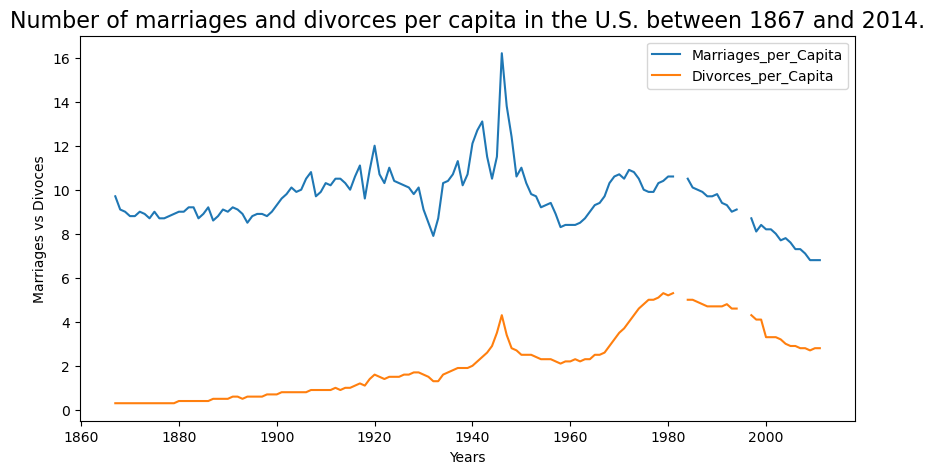

In [206]:
# Extracting the data for the chart
Year = us_data.Year.values
Marriage = us_data.Marriages_per_1000.values
Divorce = us_data.Divorces_per_1000.values

plt.figure(figsize=(10, 5))
plt.plot(Year, Marriage, label='Marriages_per_Capita')
plt.plot(Year, Divorce, label='Divorces_per_Capita')

plt.xlabel('Years')
plt.ylabel('Marriages vs Divoces')
plt.title('Number of marriages and divorces per capita in the U.S. between 1867 and 2014.', fontsize=16)
plt.legend()
plt.show()

# Question 7: Vertical Bar Chart

C:\Users\laxmi\AppData\Local\Temp\ipykernel_30552\2109970838.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  us_data_new[{'Marriages_per_1000','Divorces_per_1000'}].plot.bar()


([<matplotlib.axis.XTick at 0x1a8068af7f0>,
 [Text(0, 0, '1900'), Text(1, 0, '1950'), Text(2, 0, '2000')])

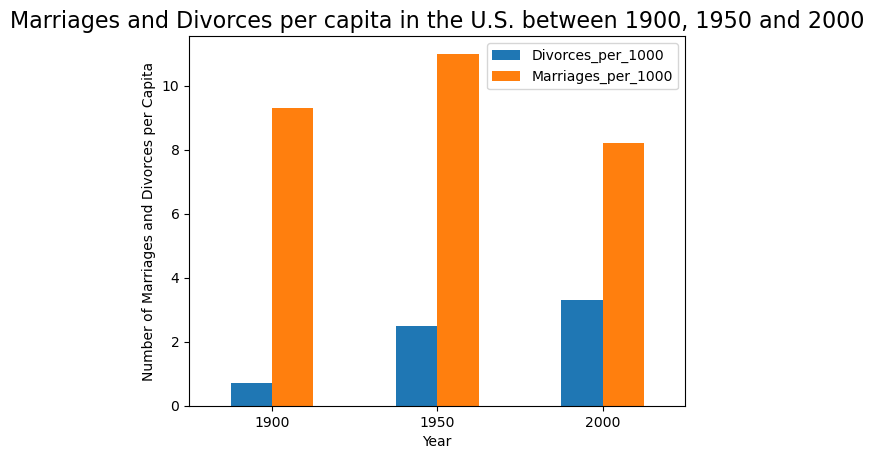

In [205]:
us_data_new = us_data.loc[us_data.Year.isin([1900,1950,2000]),['Year','Marriages_per_1000','Divorces_per_1000']]
#us_data_new

us_data_new[{'Marriages_per_1000','Divorces_per_1000'}].plot.bar()

plt.title('Marriages and Divorces per capita in the U.S. between 1900, 1950 and 2000', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Marriages and Divorces per Capita')

positions = (0,1,2)
labels = ("1900", "1950", "2000")
plt.xticks(positions, labels, rotation = 0)

# Question 8: Actors - Horizontal Bar Chart

In [187]:
import pandas as pd
import matplotlib.pyplot as plt

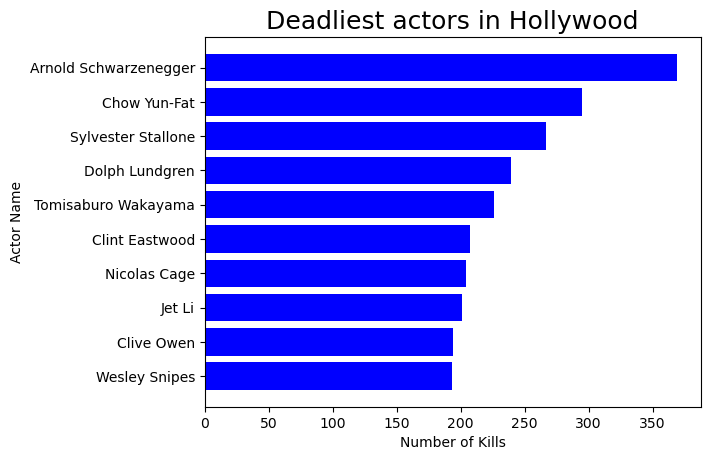

In [207]:
# Reading the data from the CSV file
actor_data = pd.read_csv('actor_kill_counts.csv')
actor_data.head(10)

actor_data = actor_data.sort_values('Count', ascending = True)
actor_data.head(10)

#actor_Names= actors.Actor
plt.barh(actor_data['Actor'], actor_data['Count'], color='Blue')

plt.xlabel('Number of Kills')
plt.ylabel('Actor Name')
plt.title('Deadliest actors in Hollywood', fontsize=18)

plt.show()

# Question 9: Roman Emperors

In [208]:
import pandas as pd
import matplotlib.pyplot as plt 

In [210]:
roman_data = pd.read_csv('roman-emperor-reigns.csv')   
#roman_data.head()

Cause_of_Death
Assassinated         22
Died in captivity     1
Executed              3
Illness               5
Killed in battle      8
Name: Emperor, dtype: int64

Text(0.5, 1.0, 'Roman Emperors by Cause of Death')

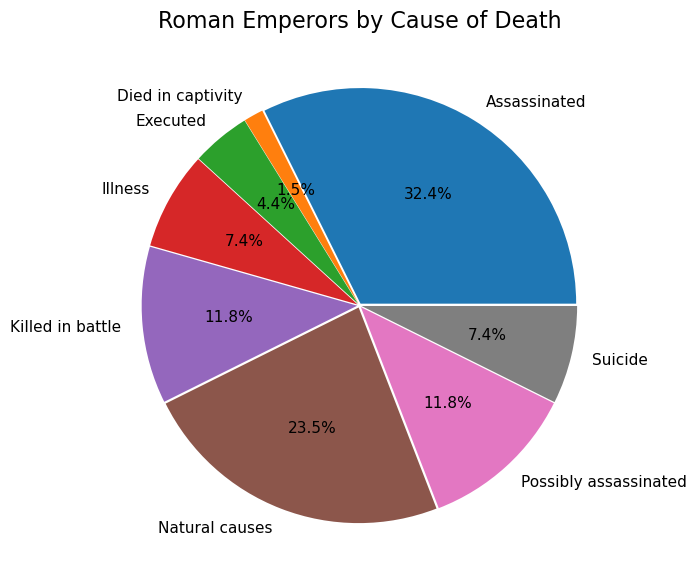

In [226]:
roman_data_new = roman_data.groupby('Cause_of_Death')['Emperor'].count()

roman_data_new.plot.pie(autopct="%.1f%%", figsize = (7,7), fontsize = 11, ylabel = '', explode=[0.01]*8)
plt.title('Roman Emperors by Cause of Death', fontsize = 16)

# Question 10: Arcade - Scatter Plot

In [227]:
import pandas as pd
import matplotlib.pyplot as plt

In [228]:
# Reading the data from the CSV file
arcade_data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv') 

In [229]:
# Extracting the data for scatter plot
Year = arcade_data['Year']
Revenue = arcade_data['Total Arcade Revenue (billions)']
Phds_Awards = arcade_data['Computer Science Doctorates Awarded (US)']

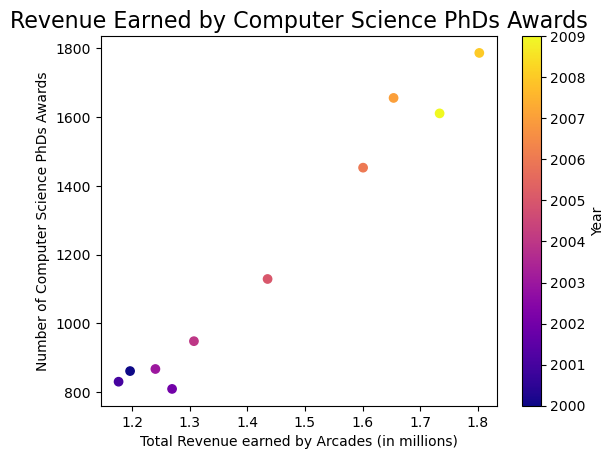

In [243]:
#Creating a scatter plot
plt.scatter(Revenue, Phds_Awards, c=Year, cmap='plasma')

#Adding the labels and title
plt.xlabel('Total Revenue earned by Arcades (in millions)')
plt.ylabel('Number of Computer Science PhDs Awards')
plt.title('Revenue Earned by Computer Science PhDs Awards', fontsize=16)

#displaying the colour bar for years and the label for it
cbar = plt.colorbar()
cbar.set_label('Year')   

plt.show() 